In [62]:
using ComputationalHeatTransfer

In [63]:
# using Plots
using LaTeXStrings

In [64]:
using Revise
using LinearAlgebra
using DifferentialEquations
using Interpolations
using Plots
pyplot()

Plots.PyPlotBackend()

In [65]:
cd(dirname(pwd()))
cd("src") 

includet("OneDOHP.jl")
using ..OneDOHP

# OHP inner part

In [66]:
T0 = 273.15
nondi_Q_to_Q = 8.52e01
t_to_nondi_t = 3.42e-01
function di_T_to_nondi_T(di_T;T0=273.15) 
    
    (di_T+T0)/T0
    
end

di_T_to_nondi_T (generic function with 1 method)

In [67]:
    ω = sqrt(1.68e003);
    ℘L = 6.2e004;
    k = 115e-003

    θinitial=1.0
    θc = 1.0; # useless

    Hwc = 0.0; #not useful later on. H between wall and condenser, 
    Hₗ   =  1600.0; # liquid wall heat transfer coeffcient
#     Hₗ   =  2.57e004; # liquid wall heat transfer coeffcient
    Hδ  = 7.34e002;


In [68]:
    
    d = 6.56e-3 # dimensionless diameter
    L = 35.0  # total length of the pipe when streched to a 1D pipe
    L2D = 1.0 # the actual length of the bended pipe in the real world
    angle = 0*pi/2 # inclination angle 
    closedornot = true

true

In [69]:
    nucleatenum = 10
    Xstations = sort(rand(nucleatenum).*L);
#     boilingΔt = 0.05

In [70]:
tube = Tube(d,L,L2D,angle,closedornot);

In [71]:
Xe = map(tuple, [1.0], [3.0])
We = [0.0]
evap = Evaporator(Xe,We);

In [72]:
Xc = map(tuple, [0.0,3.0], [1.0,4.0])
cond = Condenser(θc,Xc,Hwc);

In [73]:
numofX=16
Xps = sort(rand(2*numofX).*L);
Xp1s = Xps[1:2:end];
Xp2s = Xps[2:2:end];

dXdt0 = map(tuple,0*Xp1s,0*Xp2s)
X0 = map(tuple,Xp1s,Xp2s)


16-element Array{Tuple{Float64,Float64},1}:
 (2.0849030941011772, 2.7587486658829063)
 (2.833874451319085, 4.569747854353258)
 (5.727881832370833, 7.759761288806689)
 (8.316397088752684, 8.448055536860116)
 (8.877914003524369, 9.329168864872212)
 (10.903888931292695, 11.28617967463106)
 (12.032828031647437, 13.02936344976535)
 (13.962633777923827, 17.670625962470766)
 (18.18967347195733, 18.804694688335022)
 (19.202790359342018, 19.66332863187648)
 (20.56568325255634, 20.892529133258392)
 (21.18665790964045, 25.09311218013304)
 (25.10469379639108, 27.75739099602619)
 (27.765156396954602, 29.471579911453805)
 (29.84549214978021, 30.92648955744822)
 (31.157947602439123, 32.42960347311205)

In [74]:
Δt = 1e-4

0.0001

In [112]:
 N=3000
# N=numpts(ohp)
# X0 = [(L/4, L*3/4)]
# dXdt0 = [(0.0,0.0)]
ρ = 214.6
Xarrays,θarrays = constructXarrays(X0,N,θinitial,L)
liquids=Liquid(Hₗ,ρ,ω,℘L,X0,dXdt0,Xarrays,θarrays);

In [113]:
# P = [1.0,1.0,1.0,1.0,1.0]; # closed end

γ = 1.4;
Hδ = 7.34e2
P = 0*Xp1s .+ 1.0;
δ = 0*Xp1s .+ 2.86e-02;
vapors=Vapor(γ,Hδ,P,δ);

In [114]:
α = 0 # nondimensional thermal diffusivity = (αₐ d^2) / (νₗ height^2)
Xwallarray,θwallarray = constructXarrays(L,N,θinitial)

wall = Wall(α,Δt,Xstations,Xwallarray,θwallarray);

In [116]:
sys0_nomapping = PHPSystem_nomapping(tube,evap,cond,liquids,vapors,wall);
θ_interp_walltoliquid, θ_interp_liquidtowall, H_interp_liquidtowall = sys_interpolation(sys0_nomapping)
mapping = Mapping(θ_interp_walltoliquid, θ_interp_liquidtowall, H_interp_liquidtowall);

In [117]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors,wall,mapping);

## construct state vector U

In [118]:
sys0.liquid.θarrays

16-element Array{Array{Float64,1},1}:
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 

In [119]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L,sys0.tube.closedornot)
M = P.^(1/γ).* Lvaporplug


u=[XMδtovec(X0,dXdt0,M,δ);liquidθtovec(sys0.liquid.θarrays)];


In [120]:
cb_boiling =  DiscreteCallback(boiling_condition,boiling_affect!)
cb_merging =  DiscreteCallback(merging_condition,merging_affect!)

cbst = CallbackSet(cb_boiling,cb_merging)

CallbackSet{Tuple{},Tuple{DiscreteCallback{typeof(boiling_condition),typeof(boiling_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)},DiscreteCallback{typeof(merging_condition),typeof(merging_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}}}((), (DiscreteCallback{typeof(boiling_condition),typeof(boiling_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}(boiling_condition, boiling_affect!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1]), DiscreteCallback{typeof(merging_condition),typeof(merging_affect!),typeof(DiffEqBase.INITIALIZE_DEFAULT),typeof(DiffEqBase.FINALIZE_DEFAULT)}(merging_condition, merging_affect!, DiffEqBase.INITIALIZE_DEFAULT, DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])))

## solve OHP

In [138]:
tstep=1e-4

p = sys0
tspan = (0.0, 10.0);
prob = ODEProblem(ODE_innertube, u, tspan, p)

integrator_tube = init(prob, RK4(), dt=tstep, callback=cbst);


@time step!(integrator_tube);



  0.016827 seconds (19.37 k allocations: 17.422 MiB)


In [23]:
sys = p
sys.wall.θarray = rand(length(sys.wall.Xarray));

LoadError: [91mUndefVarError: p not defined[39m

## original mapping funciton speed up! inner part->wall

In [24]:
walltoliquid, liquidtowall = constructmapping(Xarrays,Xwallarray,closedornot,L);

In [25]:
# linear interpolation
@time interp_linear = LinearInterpolation(sys.wall.Xarray, sys.wall.θarray);

LoadError: [91mUndefVarError: sys not defined[39m

## array visit time comparison

In [26]:
@time for i = 1:length(qwall)
    sys.wall.θarray[i]
end

LoadError: [91mUndefVarError: qwall not defined[39m

In [27]:
interp_linear(3) # exactly log(3)
@time interp_linear.(35*rand(N)) # approximately log(3.1);

# @time for i = 1:length(qwall)
#     interp_linear(35*rand())
# end

LoadError: [91mUndefVarError: interp_linear not defined[39m

## testing interpolation function

In [28]:
X_inter = [0.0,1.0,2.0,2.0,3.0,3.0,4.0,5.0]
Y_inter = deepcopy(X_inter)
Y_inter[4] += 1.0
Y_inter[6] += 1.0
Y_inter[7] += 1.0
Y_inter[8] += 1.0

interp_linear = LinearInterpolation(X_inter, Y_inter)
interp_linear(3.0)

3.0

In [29]:
typeof(interp_linear)

Interpolations.Extrapolation{Float64,1,Interpolations.GriddedInterpolation{Float64,1,Float64,Gridded{Linear},Tuple{Array{Float64,1}}},Gridded{Linear},Throw{Nothing}}

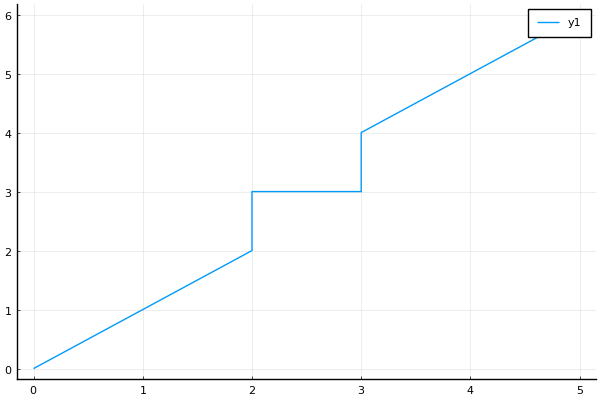

In [30]:
plot(X_inter,Y_inter)

In [31]:
@time walltoliquid, liquidtowall = constructmapping(Xarrays,Xwallarray,closedornot,L);

  0.884876 seconds (25 allocations: 605.531 KiB)


In [32]:
@time θ_interp_walltoliquid, θ_interp_liquidtowall, H_interp_liquidtowall = sys_interpolation(sys);

LoadError: [91mUndefVarError: sys not defined[39m

In [33]:
@time sys_interpolation(sys)

LoadError: [91mUndefVarError: sys not defined[39m

In [34]:
X_inner = Array{Float64}(undef, 0)

Float64[]

In [35]:
X_inner, θ_inner, H_inner=sys_interpolation(sys)

θ_interp_liquidtowall = LinearInterpolation(X_inner, θ_inner);
H_interp_liquidtowall = LinearInterpolation(X_inner, H_inner);

LoadError: [91mUndefVarError: sys not defined[39m

In [36]:
plot(X_inner_final)

LoadError: [91mUndefVarError: X_inner_final not defined[39m

In [37]:
length(sys.liquid.Xarrays)

LoadError: [91mUndefVarError: sys not defined[39m

In [61]:
n = 10
dx_vapor = 0.3
a = 2

xs = a .+ (0:n) * dx_vapor;          ## n, right is 1:n * delta

        θ_wall_inter = interp_linear

#         f(θ_wall_inter,θ_vapor,H_vapor,dx_vapor) = Hvapor*dx_vapor*(sys.wall.θarray[indexes[j]] - θ[i])

        fx = (map(θ_wall_inter, xs) .- θ[i]) .* Hvapor[i] .* dx_vapor

LoadError: [91mMethodError: no method matching -(::Interpolations.Extrapolation{Float64,1,Interpolations.GriddedInterpolation{Float64,1,Float64,Gridded{Linear},Tuple{Array{Float64,1}}},Gridded{Linear},Throw{Nothing}}, ::Int64)[39m
[91mFor element-wise subtraction, use broadcasting with dot syntax: array .- scalar[39m
[91m[0mClosest candidates are:[39m
[91m[0m  -([91m::ChainRulesCore.DoesNotExist[39m, ::Any) at C:\Users\liyux\.julia\packages\ChainRulesCore\NR7YR\src\differential_arithmetic.jl:77[39m
[91m[0m  -([91m::PyCall.PyObject[39m, ::Any) at C:\Users\liyux\.julia\packages\PyCall\BD546\src\pyoperators.jl:13[39m
[91m[0m  -([91m::ChainRulesCore.Zero[39m, ::Any) at C:\Users\liyux\.julia\packages\ChainRulesCore\NR7YR\src\differential_arithmetic.jl:117[39m
[91m[0m  ...[39m

monday 1pm